- references
    - https://www.bilibili.com/video/BV1fm4y1W7VQ/

## basics

- `ssh username@ip`
- 配置文件：`~/.ssh/config`
- `ssh -p`
    - 指定端口号，默认 `22`
- ssh 登录到服务器之后，配置一些默认执行的命令比如 `screenfetch`
    - 需要将命令写入服务器默认的 shell 中，对于 zsh 即是 `~/.zshrc`

### 免密登录

```
ssh-keygen
ssh-copy-id xx@xx.xx.xx.xx
```

- `ssh-copy-id`：将本地的 ssh 公钥复制（追加）到远程主机的 `~/.ssh/authorized_key`

## ssh 客户端与服务器端

- ssh 客户端与服务器端：连接别人与被别人连接
- ssh 客户端是一个软件程序，允许用户安全地连接到远程计算机或服务器。
- ssh 服务器（sshd）是在远程计算机上运行的软件程序，它监听来自SSH客户端的连接请求，并与之建立安全的通信会话。
    - `sudo apt install openssh-server`
    - `sudo ps -e |grep ssh`/`service ssh status`
        - `sudo systemctl status ssh`
    - `sudo service ssh start`

## 端口转发

In [1]:
from IPython.display import Image

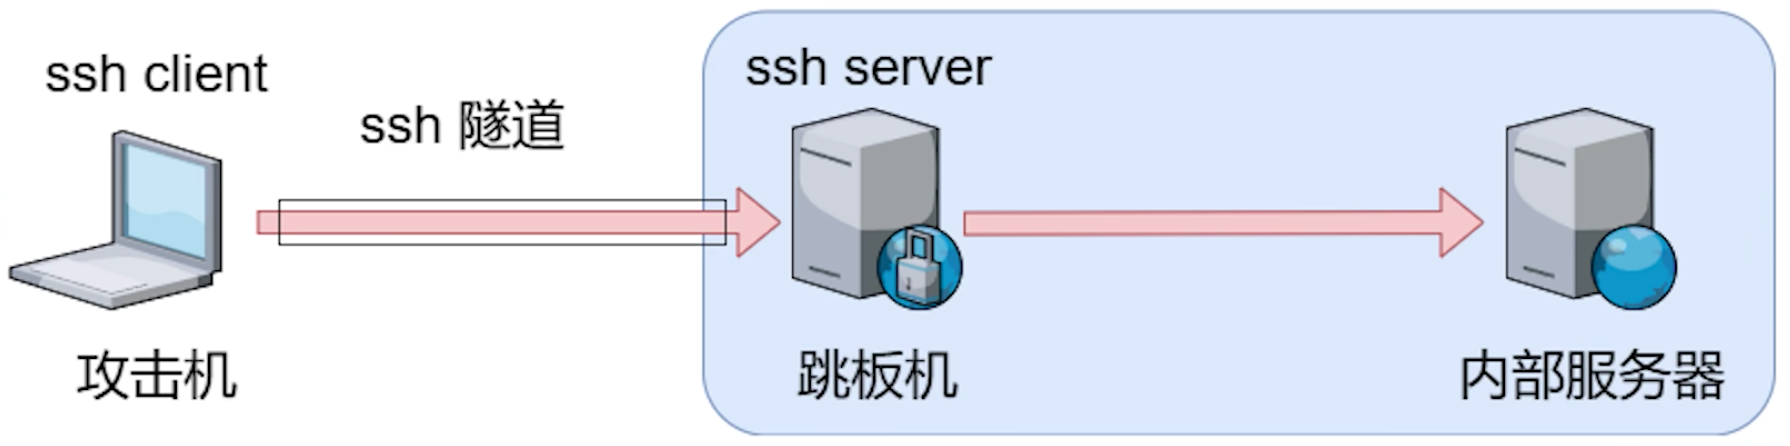

In [5]:
# 本地端口转发
Image('./imgs/relay.png', width=500)

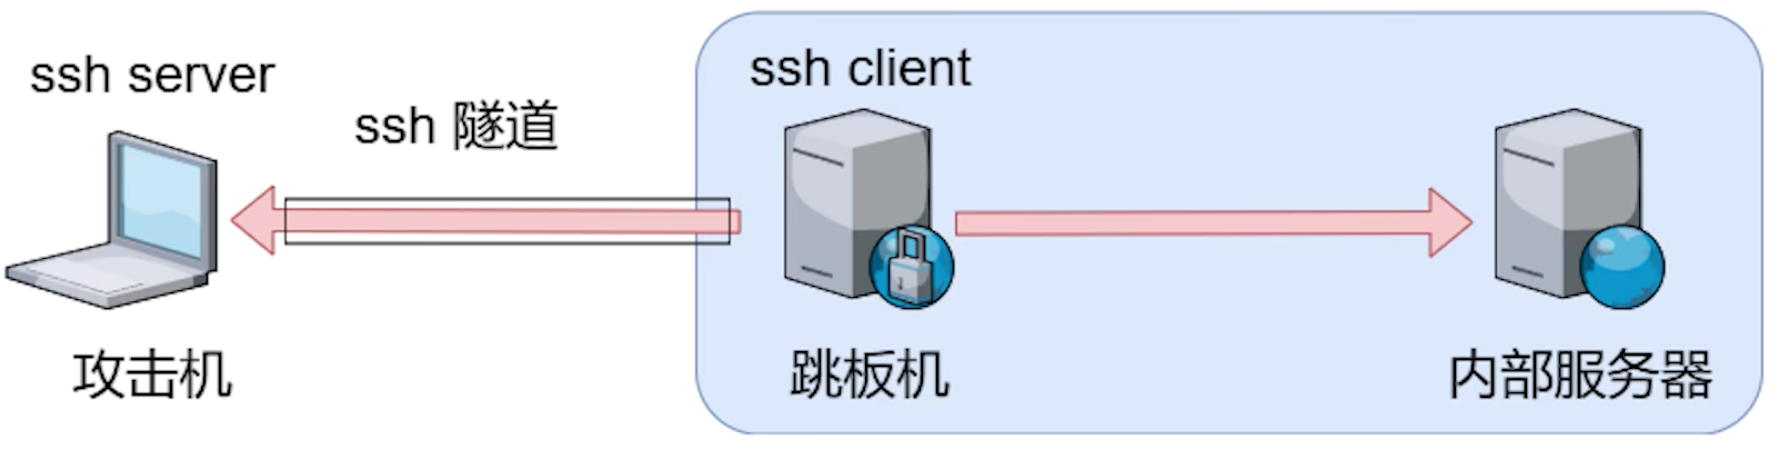

In [7]:
# 远程端口转发
Image('./imgs/remote-forward.png', width=500)

## ssh 端口转发

- server1（攻击机）, server2(跳板机), server3（内部服务器）
- 本地端口转发
    - `-L`：local
        - `ssh -L 8000:server3:22 -fN root@server2`
            - 8000 为 server1（本机）要开放的端口，
            - `server3:22`：要连接到的远程服务器地址和端口；
            - `-fN`：`-f` 后台运行，`N`：不执行命令，仅端口转发
            - `root@server2`：跳板机的用户名和地址
        - `netstat -antp | grep 8000`：本机在监听 8000 端口
        - `ssh root@127.0.0.1 -p 8000`：跳转到 server3
- 远程端口转发
    - 在 server2（跳板机上）上配置: `ssh -R 9000:server3:22 -fN root@server1`
        - `-R`: remote
    - 在 server1 上查看端口 9000：`netstat -antp | grep 9000`
    - 在 server1 上连接内部服务器（server3）: `ssh root@127.0.0.1 -p 9000`
- 动态端口转发

## `ssh -D`